In [54]:
import pandas as pd
import nltk

#Inporting the csv file that we converted from xslx
uncleaned_data = pd.read_csv('palestinet.csv',encoding = "ISO-8859-1")
uncleaned_data.head()

,Tweet Id,DateTime,Place,Source,Username,Content,hashtags,Likes Number,Quote Number,Reply Number,Retweets Number
0,1564764335079137024,2022-08-30 23:57:44,NaN,"<a href=""http://twitter.com/download/android"" ...",CrazyNormie,Why does every Corbyn cracker rightly believe ...,NaN,19,0,8,1
1,1564762949134196992,2022-08-30 23:52:13,NaN,"<a href=""http://twitter.com/download/iphone"" r...",aidanaustria,iâm having a nice time with my friends :) ht...,NaN,11,0,1,0
2,1564762561865814016,2022-08-30 23:50:41,NaN,"<a href=""http://twitter.com/download/iphone"" r...",New_Pal_Golf,"County Champs! Zoe Nelson, Katie Kelley and Ka...",['NewPalProud'],45,1,0,5
3,1564761054680388096,2022-08-30 23:44:41,NaN,"<a href=""http://twitter.com/download/iphone"" r...",HonestReporting,"No Jews, No News: The Deadly Gaza Explosion Me...",NaN,28,3,1,17
4,1564759653405318912,2022-08-30 23:39:07,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NPHSDragons,"Golf: NP wins county golf title shooting 187,...",NaN,44,0,1,6


In [55]:
uncleaned_data.tail()

,Tweet Id,DateTime,Place,Source,Username,Content,hashtags,Likes Number,Quote Number,Reply Number,Retweets Number
71688,1477076437651934976,2022-01-01 00:37:20,NaN,"<a href=""http://twitter.com/download/iphone"" r...",shathawho,a photo from 2021 that will always ground me a...,NaN,216,0,1,25
71689,1477073720875311104,2022-01-01 00:26:32,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",ninalahoud4paix,My 2022 wish: for world to embrace the incredi...,NaN,14,1,1,4
71690,1477070281596408064,2022-01-01 00:12:52,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",StanleyCohenLaw,I for one have never bought into the internati...,NaN,197,4,12,59
71691,1477069177764545024,2022-01-01 00:08:29,NaN,"<a href=""http://twitter.com/download/iphone"" r...",PalmTreesnGz,I forgot to say that partner and kid made me a...,['LASD'],15,0,2,0
71692,1477067807644922112,2022-01-01 00:03:02,NaN,"<a href=""http://twitter.com/download/android"" ...",ipsc48,Happy New Year friends. All we want for 2022 i...,NaN,241,3,6,41


In [56]:
uncleaned_data.isnull().sum()

Tweet Id               0
DateTime               0
Place              70510
Source                 0
Username               0
Content                0
hashtags           44075
Likes Number           0
Quote Number           0
Reply Number           0
Retweets Number        0
dtype: int64

In [57]:
#Removing columns that are not useful (like ,source, quote , place ,reply number)
columns_to_keep = ['Username','Tweet Id', 'DateTime', 'Content']

# Keep only the specified columns
uncleaned_data= uncleaned_data[columns_to_keep]

# Save the modified DataFrame to a new CSV file
uncleaned_data.to_csv('palestinet_sentiment_analysis.csv', index=False)

In [58]:
uncleaned_data.head()

,Username,Tweet Id,DateTime,Content
0,CrazyNormie,1564764335079137024,2022-08-30 23:57:44,Why does every Corbyn cracker rightly believe ...
1,aidanaustria,1564762949134196992,2022-08-30 23:52:13,iâm having a nice time with my friends :) ht...
2,New_Pal_Golf,1564762561865814016,2022-08-30 23:50:41,"County Champs! Zoe Nelson, Katie Kelley and Ka..."
3,HonestReporting,1564761054680388096,2022-08-30 23:44:41,"No Jews, No News: The Deadly Gaza Explosion Me..."
4,NPHSDragons,1564759653405318912,2022-08-30 23:39:07,"Golf: NP wins county golf title shooting 187,..."


In [59]:
raw_tweets = uncleaned_data.copy()

In [60]:
raw_tweets.head()

,Username,Tweet Id,DateTime,Content
0,CrazyNormie,1564764335079137024,2022-08-30 23:57:44,Why does every Corbyn cracker rightly believe ...
1,aidanaustria,1564762949134196992,2022-08-30 23:52:13,iâm having a nice time with my friends :) ht...
2,New_Pal_Golf,1564762561865814016,2022-08-30 23:50:41,"County Champs! Zoe Nelson, Katie Kelley and Ka..."
3,HonestReporting,1564761054680388096,2022-08-30 23:44:41,"No Jews, No News: The Deadly Gaza Explosion Me..."
4,NPHSDragons,1564759653405318912,2022-08-30 23:39:07,"Golf: NP wins county golf title shooting 187,..."


In [61]:
#Remove all types of punctuations, numbers, special characters and lower letters
import re #regular expression
import string

def clean_text(text):
    text = re.sub(r'@[A-Z_a-z_0-9_]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'#', '', text)     
    text = text.lower()
    return text

raw_tweets['Content'] = uncleaned_data['Content'].apply(clean_text)
raw_tweets

,Username,Tweet Id,DateTime,Content
0,CrazyNormie,1564764335079137024,2022-08-30 23:57:44,why does every corbyn cracker rightly believe ...
1,aidanaustria,1564762949134196992,2022-08-30 23:52:13,iâm having a nice time with my friends :)
2,New_Pal_Golf,1564762561865814016,2022-08-30 23:50:41,"county champs! zoe nelson, katie kelley and ka..."
3,HonestReporting,1564761054680388096,2022-08-30 23:44:41,"no jews, no news: the deadly gaza explosion me..."
4,NPHSDragons,1564759653405318912,2022-08-30 23:39:07,"golf: np wins county golf title shooting 187,..."
...,...,...,...,...
71688,shathawho,1477076437651934976,2022-01-01 00:37:20,a photo from 2021 that will always ground me a...
71689,ninalahoud4paix,1477073720875311104,2022-01-01 00:26:32,my 2022 wish: for world to embrace the incredi...
71690,StanleyCohenLaw,1477070281596408064,2022-01-01 00:12:52,i for one have never bought into the internati...
71691,PalmTreesnGz,1477069177764545024,2022-01-01 00:08:29,i forgot to say that partner and kid made me a...


In [62]:
import re
#function to replace any non-alphanumeric characters with a space
def thorough_clean(text):
  text = re.sub('[^A-Za-z0-9]', ' ', text)
  return(text)
# Function to remove non-ASCII characters
def remove_non_ascii(text):
    return re.sub(r'[^\x00-\x7F]+', '', text)

# Apply the function to the 'Content' column
raw_tweets['Content'] = raw_tweets['Content'].apply(remove_non_ascii)
raw_tweets['Content'] = raw_tweets['Content'].apply(thorough_clean)
raw_tweets

,Username,Tweet Id,DateTime,Content
0,CrazyNormie,1564764335079137024,2022-08-30 23:57:44,why does every corbyn cracker rightly believe ...
1,aidanaustria,1564762949134196992,2022-08-30 23:52:13,im having a nice time with my friends
2,New_Pal_Golf,1564762561865814016,2022-08-30 23:50:41,county champs zoe nelson katie kelley and ka...
3,HonestReporting,1564761054680388096,2022-08-30 23:44:41,no jews no news the deadly gaza explosion me...
4,NPHSDragons,1564759653405318912,2022-08-30 23:39:07,golf np wins county golf title shooting 187 ...
...,...,...,...,...
71688,shathawho,1477076437651934976,2022-01-01 00:37:20,a photo from 2021 that will always ground me a...
71689,ninalahoud4paix,1477073720875311104,2022-01-01 00:26:32,my 2022 wish for world to embrace the incredi...
71690,StanleyCohenLaw,1477070281596408064,2022-01-01 00:12:52,i for one have never bought into the internati...
71691,PalmTreesnGz,1477069177764545024,2022-01-01 00:08:29,i forgot to say that partner and kid made me a...


In [63]:
#Word frequency of raw_tweets
freq_uncleaned = pd.Series(' '.join(raw_tweets['Content']).split()).value_counts()[:50] # for top 20
freq_uncleaned

the             93472
of              52908
in              51486
palestine       51158
to              44600
and             39653
a               31253
gaza            28560
is              25034
for             20838
on              17399
israel          16038
from            13283
israeli         12432
with            12120
this            11904
that            11814
it              11646
palestinian     11420
s               11005
i               10807
are             10805
by              10121
you              9858
amp              9554
we               8367
be               8088
not              8050
as               7671
was              7567
people           7313
at               7022
an               6856
will             6790
about            6556
they             6505
their            6430
have             6321
palestinians     6212
ukraine          6140
all              5862
has              5740
but              5728
who              5529
its              5031
occupation

In [64]:
final_tweets = raw_tweets.copy()

In [65]:
# Import stopwords from NLTK corpus
from nltk.corpus import stopwords

# define stopwords
stop = set(stopwords.words('english'))

#applying stopwords to the 'Content' column 
final_tweets['Content'] = raw_tweets['Content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


In [66]:
final_tweets

,Username,Tweet Id,DateTime,Content
0,CrazyNormie,1564764335079137024,2022-08-30 23:57:44,every corbyn cracker rightly believe palestine...
1,aidanaustria,1564762949134196992,2022-08-30 23:52:13,im nice time friends
2,New_Pal_Golf,1564762561865814016,2022-08-30 23:50:41,county champs zoe nelson katie kelley kate sta...
3,HonestReporting,1564761054680388096,2022-08-30 23:44:41,jews news deadly gaza explosion media didnt re...
4,NPHSDragons,1564759653405318912,2022-08-30 23:39:07,golf np wins county golf title shooting 187 mv...
...,...,...,...,...
71688,shathawho,1477076437651934976,2022-01-01 00:37:20,photo 2021 always ground never leave one etern...
71689,ninalahoud4paix,1477073720875311104,2022-01-01 00:26:32,2022 wish world embrace incredible contributio...
71690,StanleyCohenLaw,1477070281596408064,2022-01-01 00:12:52,one never bought international zog like jews w...
71691,PalmTreesnGz,1477069177764545024,2022-01-01 00:08:29,forgot say partner kid made mug images many ac...


In [67]:
freq_cleaned = pd.Series(' '.join(final_tweets['Content']).split()).value_counts()[:50] # for top 50 most used words
freq_cleaned

palestine          51158
gaza               28560
israel             16038
israeli            12432
palestinian        11420
amp                 9554
people              7313
palestinians        6212
ukraine             6140
occupation          4960
free                4758
al                  4337
children            4300
world               4144
one                 3842
us                  3832
strip               3674
support             3657
today               3583
freepalestine       3521
war                 3463
day                 3314
killed              3123
occupied            3096
solidarity          3088
like                2835
year                2826
apartheid           2815
years               2603
yemen               2531
good                2425
gazaunderattack     2420
syria               2364
jerusalem           2300
last                2241
time                2206
forces              2165
new                 2123
morning             2094
attack              2088


In [68]:
final_tweets.to_csv('palestine_finaltweets.csv', index=False)  

In [69]:
final_tweets.describe

<bound method NDFrame.describe of               Username             Tweet Id             DateTime  \
0          CrazyNormie  1564764335079137024  2022-08-30 23:57:44   
1         aidanaustria  1564762949134196992  2022-08-30 23:52:13   
2         New_Pal_Golf  1564762561865814016  2022-08-30 23:50:41   
3      HonestReporting  1564761054680388096  2022-08-30 23:44:41   
4          NPHSDragons  1564759653405318912  2022-08-30 23:39:07   
...                ...                  ...                  ...   
71688        shathawho  1477076437651934976  2022-01-01 00:37:20   
71689  ninalahoud4paix  1477073720875311104  2022-01-01 00:26:32   
71690  StanleyCohenLaw  1477070281596408064  2022-01-01 00:12:52   
71691     PalmTreesnGz  1477069177764545024  2022-01-01 00:08:29   
71692           ipsc48  1477067807644922112  2022-01-01 00:03:02   

                                                 Content  
0      every corbyn cracker rightly believe palestine...  
1                              

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd

vectorizer = CountVectorizer(min_df=1, max_df=0.9)
X = vectorizer.fit_transform(final_tweets["Content"])

# Get feature names using get_feature_names_out
feature_names = vectorizer.get_feature_names_out()

word_freq_df = pd.DataFrame({'term': feature_names, 'occurrences': np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences'] / np.sum(word_freq_df['occurrences'])


In [71]:
print(word_freq_df.sort_values('occurrences',ascending = False).head())

              term  occurrences  frequency
31684    palestine        51158   0.044756
17721         gaza        28560   0.024986
22699       israel        16038   0.014031
22719      israeli        12432   0.010876
31786  palestinian        11420   0.009991


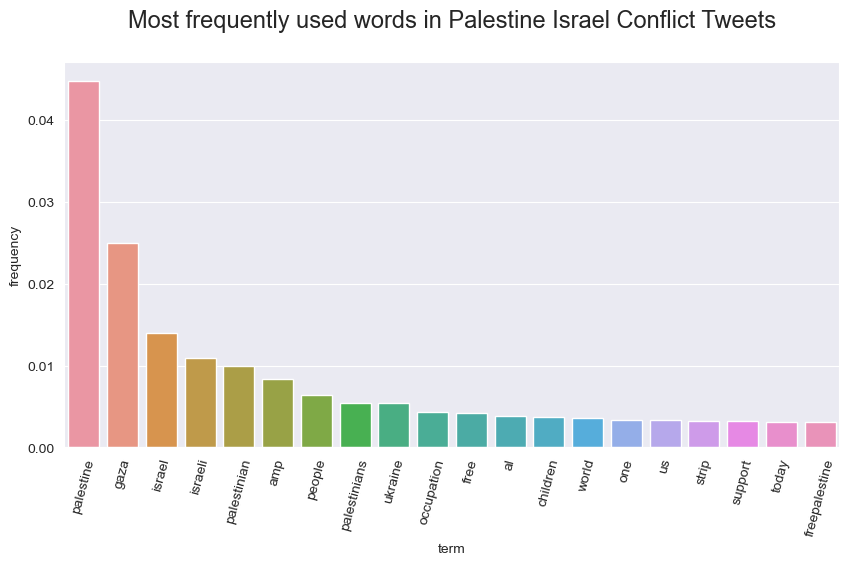

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 5))
plot = sns.barplot(x="term", y="frequency", data=word_freq_df.sort_values('frequency', ascending=False)[0:20])
plot.set_xticklabels(rotation=75, labels=word_freq_df.sort_values('frequency', ascending=False).term[0:20])
plot.set_xticks(range(20))  # Set the number of ticks to match the number of labels
plt.title("Most frequently used words in Palestine Israel Conflict Tweets", y=1.07, fontsize=17)
plt.show()


In [73]:

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000, max_df=0.5, smooth_idf=True)

# Fit and transform the data
doc_vec = vectorizer.fit_transform(final_tweets["Content"])

# Get feature names
names_features = vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to a dense matrix
dense = doc_vec.todense()

# Convert the dense matrix to a DataFrame
huhu = pd.DataFrame(dense, columns=names_features)


In [74]:
huhu.head()

,000,10,100,11,12,13,14,15,16,17,...,years,yemen,yes,yesterday,young,youre,youth,zionism,zionist,zionists
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [76]:
top2_words = get_top_n2_words(final_tweets["Content"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,gaza strip,3489
1,israeli occupation,2291
2,free palestine,2271
3,israel palestine,1822
4,occupied palestine,1588


Text(0.5, 1.05, 'Most two words used together in Palestine Isreal Conflict')

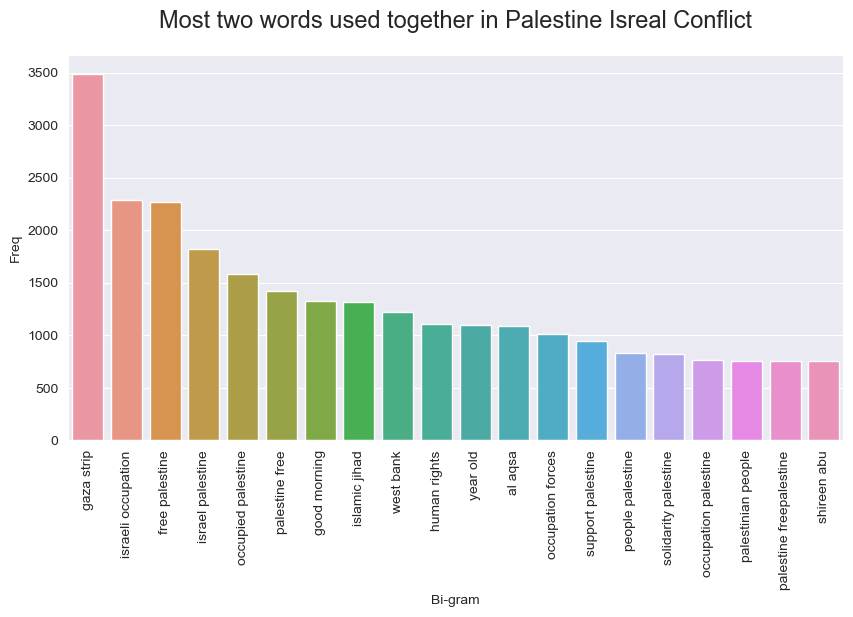

In [77]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"])
plt.title("Most two words used together in Palestine Isreal Conflict", y=1.05, fontsize=17)

In [78]:
string_Total = " ".join(final_tweets["Content"])

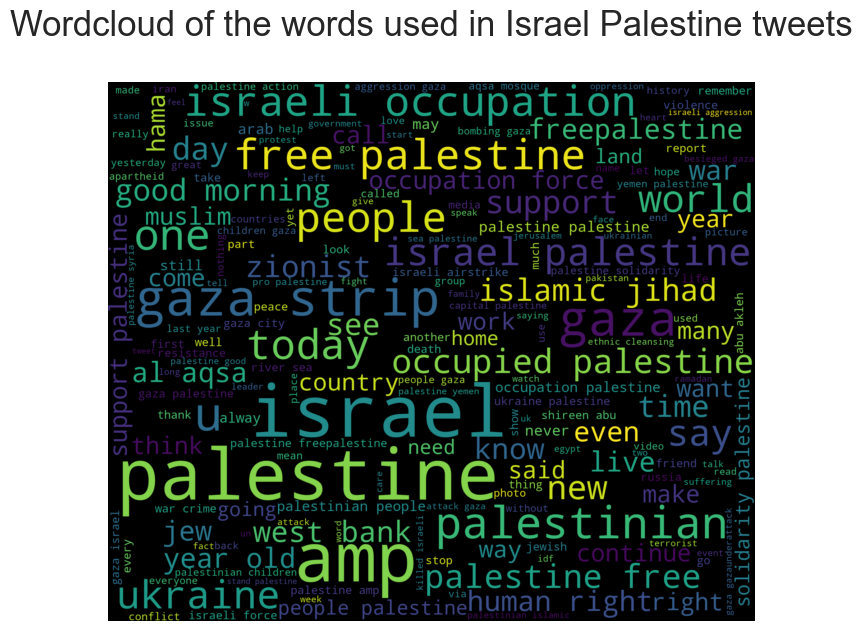

In [79]:
from textblob import TextBlob
#Wordcloud for entire corpus
fig = plt.figure(figsize=(15, 7))
from wordcloud import WordCloud
# Create WordCloud
wordcloud_stw = WordCloud(
    background_color='black',
    width=1800,
    height=1500,
    random_state=10,
    max_font_size=200,
    colormap='viridis',  # You can change the colormap to your preference
    contour_color='white',  # Contour color for better visibility
    contour_width=1.5,  # Contour width
).generate(string_Total)

# Plot the WordCloud
plt.imshow(wordcloud_stw, interpolation='bilinear')
plt.title("Wordcloud of the words used in Israel Palestine tweets", y=1.07, fontsize=25)

# Remove axis ticks
plt.axis("off")

# Display the plot
plt.show()


In [80]:
#sentiment Analysis 
final_tweets

,Username,Tweet Id,DateTime,Content
0,CrazyNormie,1564764335079137024,2022-08-30 23:57:44,every corbyn cracker rightly believe palestine...
1,aidanaustria,1564762949134196992,2022-08-30 23:52:13,im nice time friends
2,New_Pal_Golf,1564762561865814016,2022-08-30 23:50:41,county champs zoe nelson katie kelley kate sta...
3,HonestReporting,1564761054680388096,2022-08-30 23:44:41,jews news deadly gaza explosion media didnt re...
4,NPHSDragons,1564759653405318912,2022-08-30 23:39:07,golf np wins county golf title shooting 187 mv...
...,...,...,...,...
71688,shathawho,1477076437651934976,2022-01-01 00:37:20,photo 2021 always ground never leave one etern...
71689,ninalahoud4paix,1477073720875311104,2022-01-01 00:26:32,2022 wish world embrace incredible contributio...
71690,StanleyCohenLaw,1477070281596408064,2022-01-01 00:12:52,one never bought international zog like jews w...
71691,PalmTreesnGz,1477069177764545024,2022-01-01 00:08:29,forgot say partner kid made mug images many ac...


In [81]:
from textblob import TextBlob

# Create functions to get subjectivity and polarity
def get_subjectivity(text):
    return TextBlob(str(text)).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(str(text)).sentiment.polarity

# Apply functions to create new columns
final_tweets['subjectivity'] = final_tweets['Content'].apply(get_subjectivity)
final_tweets['polarity'] = final_tweets['Content'].apply(get_polarity)


In [82]:
#sentiment label 
def get_sentiment_label(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

final_tweets['sentiment_label'] = final_tweets['polarity'].apply(get_sentiment_label)


In [83]:
final_tweets['word_count'] = final_tweets['Content'].apply(lambda x: len(str(x).split()))
final_tweets['char_count'] = final_tweets['Content'].apply(lambda x: len(str(x)))


In [84]:
#print all positive tweets from most positive to least positive
positive_tweets = final_tweets[final_tweets['sentiment_label'] == 'Positive']
positive_tweets = positive_tweets.sort_values('polarity', ascending = False)
positive_tweets

,Username,Tweet Id,DateTime,Content,subjectivity,polarity,sentiment_label,word_count,char_count
44370,davegibney,1515611755740869120,2022-04-17 08:42:55,sunday morning podcast occupy time hotels look...,1.000000,1.000000e+00,Positive,20,152
40410,AhmadReida,1519021080442281984,2022-04-26 18:30:22,giving still going best days ramadan distribut...,0.300000,1.000000e+00,Positive,19,132
24666,MichelleRMarcus,1540121568428273920,2022-06-23 23:56:10,excellent statement condemning israel system a...,1.000000,1.000000e+00,Positive,19,162
24760,SaraReyi,1539965868679089920,2022-06-23 13:37:28,wonderful sunset view yaffa seaport 1948 occup...,1.000000,1.000000e+00,Positive,8,59
32543,seanstewart1997,1527047567707622912,2022-05-18 22:04:45,best signing since gaza,0.300000,1.000000e+00,Positive,4,23
...,...,...,...,...,...,...,...,...,...
70196,Sumerian2022,1478767771806694912,2022-01-05 16:38:05,proof fakestinians type peace completely clear...,0.161111,4.625929e-18,Positive,19,134
42604,AP,1516880667988082944,2022-04-20 20:45:08,amid soaring israeli palestinian tensions isra...,0.161111,4.625929e-18,Positive,18,139
48961,manniefabian,1509776747901899008,2022-04-01 06:16:41,police say several suspicious balloons items a...,0.266667,4.625929e-18,Positive,22,140
18648,s_m_marandi,1552340406796488960,2022-07-27 17:09:28,apartheid regime palestine attempts launch att...,0.494444,4.625929e-18,Positive,26,211


In [85]:
#print all negative tweets from most negative to least negative
negative_tweets = final_tweets[final_tweets['sentiment_label'] == 'Negative']
negative_tweets = negative_tweets.sort_values('polarity', ascending = True)
negative_tweets

,Username,Tweet Id,DateTime,Content,subjectivity,polarity,sentiment_label,word_count,char_count
67261,BondWolfie,1484586226006908928,2022-01-21 17:58:33,saying death palestine evil saying death israe...,1.000000,-1.000000e+00,Negative,8,52
34415,tolhild4n,1525453631058850048,2022-05-14 12:31:01,turks et al condemning attacks shireenabuakleh...,1.000000,-1.000000e+00,Negative,21,161
37447,rinistala1408,1522906700839226880,2022-05-07 11:50:26,zionists worst nightmare book geography palest...,1.000000,-1.000000e+00,Negative,8,64
18665,nannoless,1552324644799143936,2022-07-27 16:06:50,didnt think id say act like get account israel...,1.000000,-1.000000e+00,Negative,24,156
34420,jobellerina,1525451704312943104,2022-05-14 12:23:22,staying twitter foreseeable stand gleeful way ...,1.000000,-1.000000e+00,Negative,29,204
...,...,...,...,...,...,...,...,...,...
24893,MiddleEastEye,1539684986441317888,2022-06-22 19:01:21,palestine action forced elbit systems israeli ...,0.180000,-5.551115e-18,Negative,16,140
1386,EretzIsrael,1563656387913306112,2022-08-27 22:35:08,son taisir jaabari senior islamic jihad pij te...,0.380000,-5.551115e-18,Negative,29,216
1297,lennybendavid,1563791410142351104,2022-08-28 07:31:40,son taisir jaabari senior islamic jihad pij co...,0.380000,-5.551115e-18,Negative,30,203
69161,ChrisHu34451470,1480801924635004928,2022-01-11 07:21:05,palestine action claim victory elbit systems e...,0.166667,-4.625929e-18,Negative,25,194


In [86]:
#Get % of positive, negative, neutral tweets
print("% of positive tweets:", round((positive_tweets.shape[0]/final_tweets.shape[0])*100, 1))
print("% of negative tweets:", round((negative_tweets.shape[0]/final_tweets.shape[0])*100, 1))

% of positive tweets: 41.6
% of negative tweets: 22.0


In [87]:
#Printing the final sentiments 
final_tweets['Sentiment'] = final_tweets['sentiment_label']

# Displaying it 
print(final_tweets[['Username','Tweet Id' ,'DateTime' ,'Content','polarity' ,'subjectivity','Sentiment' ]])
# Saving it to a CSV file
final_tweets[['Username','Tweet Id' ,'DateTime' ,'Content','polarity' ,'subjectivity','Sentiment']].to_csv('PalestineTweetsFiltered.csv', index=False)


              Username             Tweet Id             DateTime  \
0          CrazyNormie  1564764335079137024  2022-08-30 23:57:44   
1         aidanaustria  1564762949134196992  2022-08-30 23:52:13   
2         New_Pal_Golf  1564762561865814016  2022-08-30 23:50:41   
3      HonestReporting  1564761054680388096  2022-08-30 23:44:41   
4          NPHSDragons  1564759653405318912  2022-08-30 23:39:07   
...                ...                  ...                  ...   
71688        shathawho  1477076437651934976  2022-01-01 00:37:20   
71689  ninalahoud4paix  1477073720875311104  2022-01-01 00:26:32   
71690  StanleyCohenLaw  1477070281596408064  2022-01-01 00:12:52   
71691     PalmTreesnGz  1477069177764545024  2022-01-01 00:08:29   
71692           ipsc48  1477067807644922112  2022-01-01 00:03:02   

                                                 Content  polarity  \
0      every corbyn cracker rightly believe palestine... -0.107143   
1                                   im nice